In [1]:
import os
import numpy as np
import sys
import zipfile
import json
import pandas as pd
import matplotlib.pyplot as plt

DATA = os.path.join('..', 'perovskites', 'data', 'example.zip')

try:
    import tifffile as tf
except ImportError:
    print('Installing tifffile package ...')
    os.system("pip install tifffile")
    print('Done!')
    import tifffile as tf

The zip file contains a folder named `primary_vids` and a csv file named `analyzed_data.csv`. The latter consists of the diffusion length (Ld) and the spatially-averaged PL pixel data which has been in use till now. The `primary_vids` contains the data folders with PL images.

In [2]:
# Read directly from the zip file
zf = zipfile.ZipFile(DATA)
with zf.open('analyzed_data.csv') as file:
    df = pd.read_csv(file, index_col=0)

with zf.open('primary_vids/Experiment Info/experiment_info.json') as file:
    exp_info = json.load(file)
    
df.head()

,t,Incident_flux,xy0t0,xy0t0_valid_only,exp_times,exp_times_valid_only,xy0t0_cts,xy0t0_cts_valid_only,PLQY_xy0t0,PLQY_xy0t0_valid_only,...,frame_corrupted,Index,DC LD [nm],Low Freq LD [nm],High Freq LD [nm],Transmitted Power [W],DC LD [norm],Low Freq LD [norm],High Freq LD [norm],Transmitted Power [norm]
0.0,0.0,1.250000e+22,2.130000e+17,2.130000e+17,0.0,0.0,2.130000e+16,2.130000e+16,0.000017,0.000017,...,False,0.0,82.194489,80.966546,80.111765,0.000002,1.000000,1.000000,1.000000,1.000000
1.0,300.0,1.250000e+22,1.360000e+18,1.360000e+18,0.0,0.0,1.360000e+17,1.360000e+17,0.000109,0.000109,...,False,1.0,106.274299,102.874487,102.674620,0.000002,1.292961,1.270580,1.281642,1.070749
2.0,600.0,1.250000e+22,6.260000e+18,6.260000e+18,0.0,0.0,6.270000e+17,6.270000e+17,0.000501,0.000501,...,False,2.0,125.711414,123.903528,121.923113,0.000002,1.529438,1.530305,1.521913,1.164229
3.0,900.0,1.250000e+22,1.190000e+19,1.190000e+19,0.0,0.0,1.190000e+18,1.190000e+18,0.000950,0.000950,...,False,3.0,140.087781,135.428144,134.067284,0.000003,1.704345,1.672643,1.673503,1.257022
4.0,1200.0,1.250000e+22,1.550000e+19,1.550000e+19,0.0,0.0,1.550000e+18,1.550000e+18,0.001237,0.001237,...,False,4.0,154.990586,152.282351,149.307247,0.000003,1.885657,1.880806,1.863737,1.355720


The column `Low Freq LD [nm]` is used for the Ld time series and `xy0t0` for the spatially-averaged PL intensities.

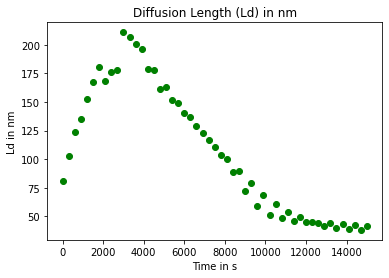

In [3]:
plt.scatter(df['t'], df['Low Freq LD [nm]'], c='green');
plt.xlabel('Time in s')
plt.ylabel('Ld in nm')
plt.title('Diffusion Length (Ld) in nm');

Use the following function to visualize each PL image by its time point

In [4]:
def get_PL_image(time):

    """
    Returns the image array when an integer time point is passed.
    
    Parameters
    -------------------
    time : int
        The time point of the PL image is to be loaded
        
    Returns
    -------------------
    numpy.ndarray
        The 2D array of the PL image
    
    """
    exp_name = exp_info['ExperimentID']
    image_path = '/'.join(['primary_vids', exp_name + '_grad0_loc0_time' + str(time), 'MMStack_Pos0.ome.tif'])
    
    # read the tiff image stack
    with zf.open(image_path) as file:
        img_stack = tf.imread(file)
     
    # Reorder axes to make it scikit-image compatible
    if len(img_stack.shape)>2:
        img_stack = np.swapaxes(img_stack,0,2)
        img_stack = np.swapaxes(img_stack,0,1)
    
    # If a regular 2D image, just return it
    if len(img_stack.shape)<3:
        return img_stack
    
    # Return the mean of pixels along the stacking axis
    return np.mean(img_stack, axis=2)    

Text(0.5, 1.0, 'PL image at time point 2')

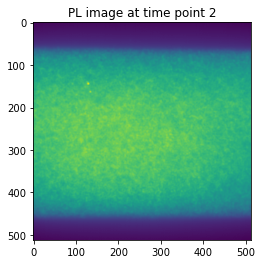

In [5]:
time = 2
img = get_PL_image(time)
plt.imshow(img)
plt.title('PL image at time point ' + str(time))